# Experiments

## Contents
1. [Set-Up](#Set-Up)
2. [Data](#Data)
3. [Summary Statistics](#Summary-Statistics)
4. [Raw Data](#Raw-Data)
5. [Fourier Transform](#Fourier-Transform)

## Set-Up
- Download the [Epileptic Seizure Recognition Data Set](http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition) and place it in the current directory.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import util
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Data
We first parse our dataset.

In [2]:
X, y, ids, chunks = util.parse_data()
n = X.shape[0]
classes = np.unique(y)
num_chunks = np.unique(chunks).shape[0]

## Summary Statistics
For our baseline, we use summary statistic features as inputs to our models. From plotting, it seems that minimum and standard deviation may be useful.

In [3]:
X_b = np.concatenate((np.amin(X, axis=1).reshape(n, 1), np.std(X, axis=1).reshape(n, 1)), axis=1)

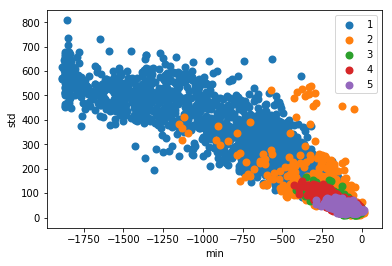

In [4]:
plt.figure()
for c in classes:
    plt.scatter(X_b[y == c, 0], X_b[y == c, 1], linewidth=2, label=str(c))
plt.xlabel('min')
plt.ylabel('std')
plt.legend()
plt.show()

### Softmax

In [5]:
b_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=1000)
b_scores, b_fold_acc, b_cm = util.evaluate_model(X_b, y, ids, classes, b_clf, param_grid={})

In [6]:
b_scores

{'accuracy': 0.42634782608695654,
 'f1_macro': 0.3972504228197936,
 'f1_class_1': 0.8703396992862562,
 'f1_class_2': 0.2074925626653604,
 'f1_class_3': 0.09845672954264542,
 'f1_class_4': 0.3844553720042689,
 'f1_class_5': 0.4255077506004373}

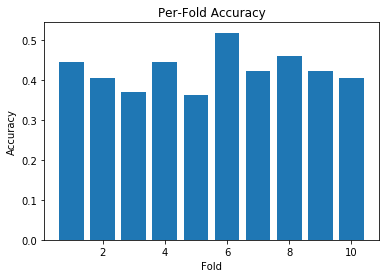

In [7]:
util.plot_fold_accuracy(b_fold_acc)

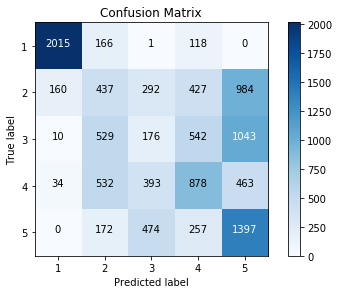

In [8]:
util.visualize_confusion_matrix(b_cm, classes)

### KNN

In [9]:
bk_clf = KNeighborsClassifier()
bk_scores, bk_fold_acc, bk_cm = util.evaluate_model(
    X_b, y, chunks, classes, bk_clf, param_grid={'n_neighbors': range(1, 10)},
    inner_k=num_chunks-1, outer_k=num_chunks)

In [10]:
bk_scores

{'accuracy': 0.48199999999999993,
 'f1_macro': 0.47515657420751106,
 'f1_class_1': 0.9027053273144976,
 'f1_class_2': 0.31615047862228546,
 'f1_class_3': 0.2947089034813258,
 'f1_class_4': 0.4012549166121686,
 'f1_class_5': 0.4609632450072784}

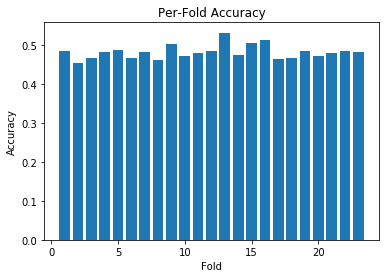

In [11]:
util.plot_fold_accuracy(bk_fold_acc, k=num_chunks)

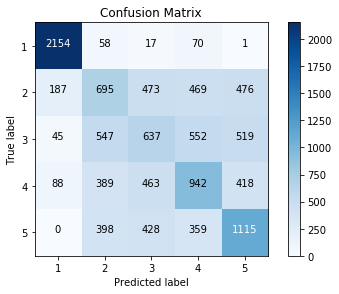

In [12]:
util.visualize_confusion_matrix(bk_cm, classes)

## Raw Data
### Softmax

In [14]:
r_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=2000)
r_scores, r_fold_acc, r_cm = util.evaluate_model(X, y, ids, classes, r_clf, param_grid={})

In [15]:
r_scores

{'accuracy': 0.1973913043478261,
 'f1_macro': 0.1923606559831909,
 'f1_class_1': 0.29171467074354923,
 'f1_class_2': 0.15219380860144247,
 'f1_class_3': 0.1261003417972107,
 'f1_class_4': 0.2162434565170394,
 'f1_class_5': 0.17555100225671294}

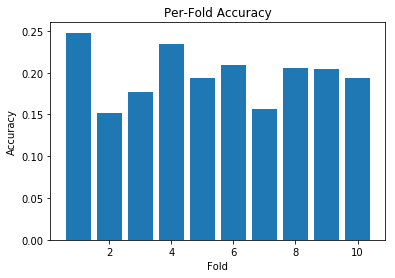

In [16]:
util.plot_fold_accuracy(r_fold_acc)

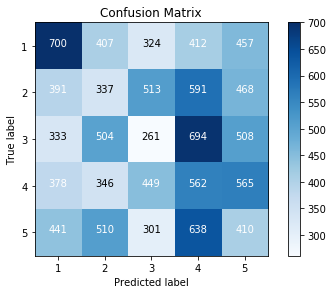

In [17]:
util.visualize_confusion_matrix(r_cm, classes)

### KNN

In [19]:
rk_clf = KNeighborsClassifier()
rk_scores, rk_fold_acc, rk_cm = util.evaluate_model(
    X, y, chunks, classes, rk_clf, param_grid={'n_neighbors': range(1, 10)},
    inner_k=num_chunks-1, outer_k=num_chunks)

In [20]:
rk_scores

{'accuracy': 0.44217391304347825,
 'f1_macro': 0.45090302973553836,
 'f1_class_1': 0.8060241099307066,
 'f1_class_2': 0.3868559884325974,
 'f1_class_3': 0.391231886653717,
 'f1_class_4': 0.4664788308791527,
 'f1_class_5': 0.20392433278151775}

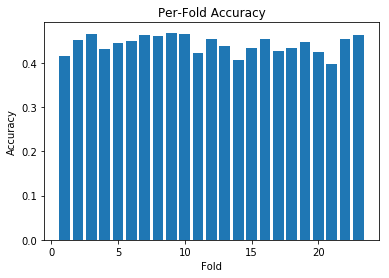

In [21]:
util.plot_fold_accuracy(rk_fold_acc, k=num_chunks)

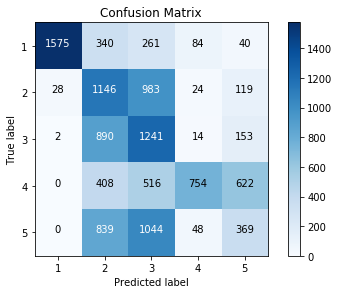

In [22]:
util.visualize_confusion_matrix(rk_cm, classes)

## Fourier Transform

In [23]:
X_f = np.fft.rfft(X).astype(float)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


### Softmax

In [24]:
f_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=5000)
f_scores, f_fold_acc, f_cm = util.evaluate_model(X_f, y, ids, classes, f_clf, param_grid={})

In [25]:
f_scores

{'accuracy': 0.20034782608695653,
 'f1_macro': 0.19041385746577005,
 'f1_class_1': 0.293683367566732,
 'f1_class_2': 0.1491842360969306,
 'f1_class_3': 0.09775607448805299,
 'f1_class_4': 0.2280214992762856,
 'f1_class_5': 0.1834241099008492}

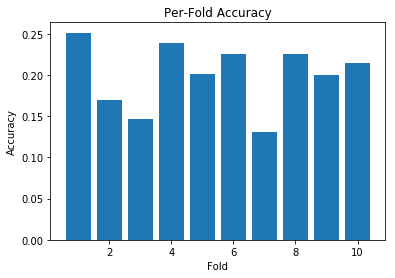

In [26]:
util.plot_fold_accuracy(f_fold_acc)

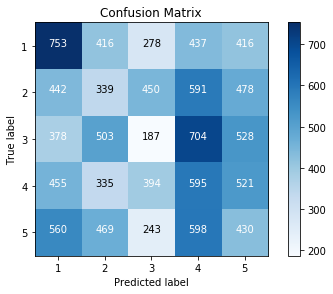

In [27]:
util.visualize_confusion_matrix(f_cm, classes)

### KNN

In [28]:
fk_clf = KNeighborsClassifier()
fk_scores, fk_fold_acc, fk_cm = util.evaluate_model(
    X_f, y, chunks, classes, fk_clf, param_grid={'n_neighbors': range(1, 10)},
    inner_k=num_chunks-1, outer_k=num_chunks)

In [29]:
fk_scores

{'accuracy': 0.45339130434782604,
 'f1_macro': 0.46563105356828416,
 'f1_class_1': 0.7996478985634196,
 'f1_class_2': 0.3821037523903017,
 'f1_class_3': 0.398029397107676,
 'f1_class_4': 0.4688302592345636,
 'f1_class_5': 0.2795439605454597}

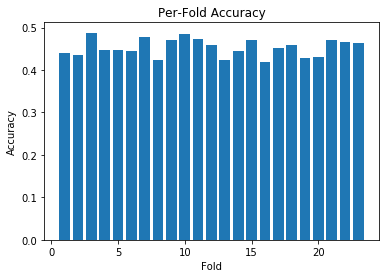

In [30]:
util.plot_fold_accuracy(fk_fold_acc, k=num_chunks)

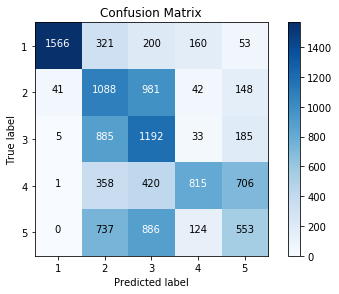

In [31]:
util.visualize_confusion_matrix(fk_cm, classes)